In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import os
import shutil

working_dir = "/kaggle/working"

# Iterate through all files and directories in the working directory
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    
    # Remove files
    if os.path.isfile(item_path):
        os.remove(item_path)
    # Remove directories
    elif os.path.isdir(item_path):
        shutil.rmtree(item_path)

print("All contents within /kaggle/working have been deleted.")


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/8000-images-best-pt/best.pt
/kaggle/input/8000-images-dataset/README.dataset.txt
/kaggle/input/8000-images-dataset/README.roboflow.txt
/kaggle/input/8000-images-dataset/data.yaml
/kaggle/input/8000-images-dataset/valid/labels/302e07eb7155dc39_jpg.rf.3ade9b6d15fad6cf248ac940123b5681.txt
/kaggle/input/8000-images-dataset/valid/labels/3f733474f5833879_jpg.rf.07c0139b4940aeadf3a0480dff74626e.txt
/kaggle/input/8000-images-dataset/valid/labels/d5ec6c4bded4c388_jpg.rf.8893b6718d4b464d2010c126577f4015.txt
/kaggle/input/8000-images-dataset/valid/labels/7df8dbc0eb50f51c_jpg.rf.68d55cd7ee71f16071f1e0f14576b9b1.txt
/kaggle/input/8000-images-dataset/valid/labels/9d015956ddf611c4_jpg.rf.96ccab6c34356e58a2ce77a99931f684.txt
/kaggle/input/8000-images-dataset/valid/labels/ae4ea32f2aaf935b_jpg.rf.04d7fca0448f530852b05aa5e2664854.txt
/kaggle/input/8000-images-dataset/valid/labels/ec04ff0dc10423a8_jpg.rf.74991b6912f34b733423d4a3c800ce81.txt
/kaggle/input/8000-images-dataset/valid/labels/86fd

In [2]:
import os
import cv2
import shutil

image_dir = "/kaggle/input/8000-images-dataset"
write_dir = "/kaggle/working/"

def adjust_brightness_contrast(image,alpha,beta):
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

def simple_white_balance(image):
    result = image.astype(np.float32)

    avg_b = np.mean(result[:, :, 0])
    avg_g = np.mean(result[:, :, 1])
    avg_r = np.mean(result[:, :, 2])
    
    avg_gray = (avg_b + avg_g + avg_r) / 3
    scale_b = avg_gray / avg_b
    scale_g = avg_gray / avg_g
    scale_r = avg_gray / avg_r

    result[:, :, 0] *= scale_b
    result[:, :, 1] *= scale_g
    result[:, :, 2] *= scale_r

    result = np.clip(result, 0, 255).astype(np.uint8)
    return result

def histogram_equalisation(image):
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])
    hist_eq_image = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

    return hist_eq_image;

In [3]:
import os
import cv2
import shutil
import numpy as np

base_dir = "/kaggle/input/8000-images-dataset"
write_dir = "/kaggle/working"

subsets = ["train", "valid", "test"]

for subset in subsets:
    images_path = os.path.join(base_dir, subset, "images")
    labels_path = os.path.join(base_dir, subset, "labels")

    images_output = os.path.join(write_dir, subset, "images")
    labels_output = os.path.join(write_dir, subset, "labels")
    os.makedirs(images_output, exist_ok=True)
    os.makedirs(labels_output, exist_ok=True)

    for filename in os.listdir(images_path):
        in_img = os.path.join(images_path, filename)
        out_img = os.path.join(images_output, filename)
        
        image = cv2.imread(in_img)
        if image is None:
            shutil.copy2(in_img, out_img)
            continue

        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(out_img, gray_image)

    for filename in os.listdir(labels_path):
        in_label = os.path.join(labels_path, filename)
        out_label = os.path.join(labels_output, filename)
        shutil.copy2(in_label, out_label)

In [4]:
# Upgrade PyTorch and Torchvision if needed
!pip install --upgrade torch torchvision

# Install PIL (Pillow) and NumPy if not already present
!pip install --upgrade pillow numpy

!pip install torch
!pip install tqdm

!pip install --upgrade numpy
!pip install --upgrade --force-reinstall numpy matplotlib

# If you need a specific version of Torchvision that supports the model you're using, specify it like this:
# !pip install --upgrade torch==2.0.0 torchvision==0.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100%|██████████| 160M/160M [00:00<00:00, 196MB/s]



=== Epoch 1/10 ===


Train Loss: 0.1338


Train Acc (IoU ≥ 0.5): 0.9750


Val Loss: 0.1038


Val Acc (IoU ≥ 0.5): 0.9814
--> Saved best model (val loss: 0.1038)

=== Epoch 2/10 ===


Train Loss: 0.1147


Train Acc (IoU ≥ 0.5): 0.9807


Val Loss: 0.1039


Val Acc (IoU ≥ 0.5): 0.9839

=== Epoch 3/10 ===


Train Loss: 0.1087


Train Acc (IoU ≥ 0.5): 0.9806


Val Loss: 0.1036


Val Acc (IoU ≥ 0.5): 0.9812
--> Saved best model (val loss: 0.1036)

=== Epoch 4/10 ===


Train Loss: 0.0983


Train Acc (IoU ≥ 0.5): 0.9872


Val Loss: 0.0997


Val Acc (IoU ≥ 0.5): 0.9872
--> Saved best model (val loss: 0.0997)

=== Epoch 5/10 ===


Train Loss: 0.0968


Train Acc (IoU ≥ 0.5): 0.9878


Val Loss: 0.0996


Val Acc (IoU ≥ 0.5): 0.9863
--> Saved best model (val loss: 0.0996)

=== Epoch 6/10 ===


Train Loss: 0.0963


Train Acc (IoU ≥ 0.5): 0.9877


Val Loss: 0.0996


Val Acc (IoU ≥ 0.5): 0.9852
--> Saved best model (val loss: 0.0996)

=== Epoch 7/10 ===


Train Loss: 0.0950


Train Acc (IoU ≥ 0.5): 0.9877


Val Loss: 0.0993


Val Acc (IoU ≥ 0.5): 0.9863
--> Saved best model (val loss: 0.0993)

=== Epoch 8/10 ===


Train Loss: 0.0948


Train Acc (IoU ≥ 0.5): 0.9881


Val Loss: 0.0994


Val Acc (IoU ≥ 0.5): 0.9864

=== Epoch 9/10 ===


Train Loss: 0.0947


Train Acc (IoU ≥ 0.5): 0.9880


Val Loss: 0.0991


Val Acc (IoU ≥ 0.5): 0.9871
--> Saved best model (val loss: 0.0991)

=== Epoch 10/10 ===


Train Loss: 0.0947


Train Acc (IoU ≥ 0.5): 0.9880


Val Loss: 0.0993


Val Acc (IoU ≥ 0.5): 0.9870

Training complete.


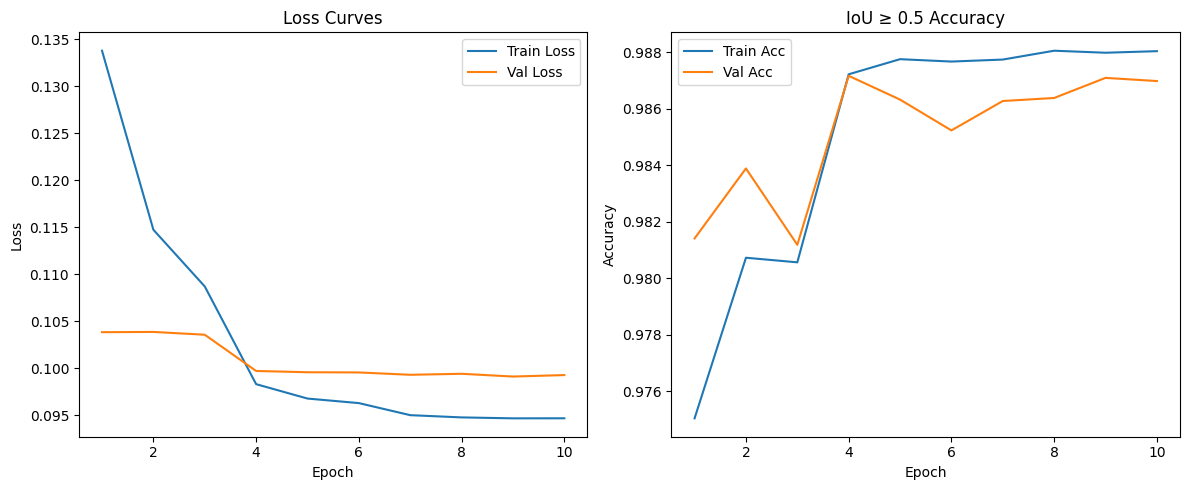

Saved final model as final_model.pth


In [5]:
import os
import numpy as np
import torch
import torch.utils.data
import torchvision
from torchvision import transforms
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from PIL import Image
from tqdm import tqdm
import concurrent.futures
import matplotlib.pyplot as plt

# ---------------------------
# Helper Functions
# ---------------------------

def read_yolo_labels(label_path, img_width, img_height):
    boxes, labels = [], []
    if not os.path.exists(label_path):
        return boxes, labels
    with open(label_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 5:
                continue
            cls = int(parts[0])
            x_center, y_center, w, h = map(float, parts[1:5])
            x_center *= img_width
            y_center *= img_height
            w *= img_width
            h *= img_height
            xmin = x_center - w / 2
            ymin = y_center - h / 2
            xmax = x_center + w / 2
            ymax = y_center + h / 2
            boxes.append([xmin, ymin, xmax, ymax])
            labels.append(cls + 1)
    return boxes, labels


def compute_iou_np(box1, box2):
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0


def compute_image_accuracy(args):
    gt_boxes, pred_boxes = args
    if len(gt_boxes) == 0:
        return None
    matched = 0
    for gt in gt_boxes:
        for pb in pred_boxes:
            if compute_iou_np(gt, pb) >= 0.5:
                matched += 1
                break
    return matched / len(gt_boxes)


def compute_dataset_accuracy(data_loader, model, device, desc="Accuracy"):
    model.eval()
    tasks = []
    with torch.no_grad():
        for images, targets in tqdm(data_loader, desc=desc, leave=False):
            images = [img.to(device) for img in images]
            outputs = model(images)
            for i, out in enumerate(outputs):
                gt = targets[i]['boxes'].cpu().numpy()
                pb = out['boxes'].cpu().numpy()
                if len(gt) > 0:
                    tasks.append((gt, pb))
    with concurrent.futures.ProcessPoolExecutor(max_workers=4) as exe:
        results = list(tqdm(exe.map(compute_image_accuracy, tasks),
                            total=len(tasks), desc="IoU tasks", leave=False))
    results = [r for r in results if r is not None]
    return float(np.mean(results)) if results else 0.0

# ---------------------------
# Dataset
# ---------------------------

class YoloDataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels_dir, transforms=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transforms = transforms
        self.files = sorted([f for f in os.listdir(images_dir)
                             if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        img_name = self.files[idx]
        img_path = os.path.join(self.images_dir, img_name)
        img = Image.open(img_path).convert("RGB")
        w, h = img.size

        base = os.path.splitext(img_name)[0]
        lbl_path = os.path.join(self.labels_dir, base + ".txt")
        boxes, labels = read_yolo_labels(lbl_path, w, h)

        if boxes:
            boxes = torch.tensor(boxes, dtype=torch.float32)
            labels = torch.tensor(labels, dtype=torch.int64)
        else:
            boxes = torch.zeros((0, 4), dtype=torch.float32)
            labels = torch.zeros((0,), dtype=torch.int64)

        target = {"boxes": boxes, "labels": labels, "image_id": torch.tensor([idx])}
        if self.transforms:
            img = self.transforms(img)
        return img, target


def collate_fn(batch):
    return tuple(zip(*batch))

# ---------------------------
# Main Training Code
# ---------------------------

def main():
    train_images_dir = "/kaggle/working/train/images"
    train_labels_dir = "/kaggle/working/train/labels"
    val_images_dir   = "/kaggle/working/valid/images"
    val_labels_dir   = "/kaggle/working/valid/labels"

    data_transforms = transforms.Compose([transforms.ToTensor()])

    train_ds = YoloDataset(train_images_dir, train_labels_dir, transforms=data_transforms)
    val_ds   = YoloDataset(val_images_dir,   val_labels_dir,   transforms=data_transforms)

    train_loader = torch.utils.data.DataLoader(train_ds, batch_size=4,
                                               shuffle=True, collate_fn=collate_fn, num_workers=2)
    val_loader   = torch.utils.data.DataLoader(val_ds,   batch_size=4,
                                               shuffle=False,collate_fn=collate_fn, num_workers=2)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    num_classes = 2

    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    for param in model.backbone.body.parameters():
        param.requires_grad = False
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.to(device)

    params = [p for p in model.parameters() if p.requires_grad]
    optimizer = torch.optim.SGD(params, lr=0.005, momentum=0.9, weight_decay=0.0005)
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

    num_epochs = 10
    best_val_loss = float("inf")
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(1, num_epochs + 1):
        print(f"\n=== Epoch {epoch}/{num_epochs} ===")
        model.train()
        running_loss = 0.0

        # Training Loop
        for images, targets in tqdm(train_loader, desc="Train", leave=False):
            imgs = [img.to(device) for img in images]
            targs = [{k: v.to(device) for k, v in t.items()} for t in targets]
            loss_dict = model(imgs, targs)
            loss = sum(loss for loss in loss_dict.values())
            running_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        lr_scheduler.step()
        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        print(f"Train Loss: {avg_train_loss:.4f}")

        # Training Accuracy
        train_acc = compute_dataset_accuracy(train_loader, model, device, desc="Train Acc")
        train_accs.append(train_acc)
        print(f"Train Acc (IoU ≥ 0.5): {train_acc:.4f}")

        # Validation Loss
        val_running_loss = 0.0
        model.train()
        for images, targets in tqdm(val_loader, desc="Val Loss", leave=False):
            imgs = [img.to(device) for img in images]
            targs = [{k: v.to(device) for k, v in t.items()} for t in targets]
            loss_dict = model(imgs, targs)
            val_running_loss += sum(loss for loss in loss_dict.values()).item()
        avg_val_loss = val_running_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        print(f"Val Loss: {avg_val_loss:.4f}")

        # Validation Accuracy
        model.eval()
        val_acc = compute_dataset_accuracy(val_loader, model, device, desc="Val Acc")
        val_accs.append(val_acc)
        print(f"Val Acc (IoU ≥ 0.5): {val_acc:.4f}")

        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            torch.save(model.state_dict(), "best_model.pth")
            print(f"--> Saved best model (val loss: {best_val_loss:.4f})")

    print("\nTraining complete.")

    # Plotting
    epochs = list(range(1, num_epochs + 1))
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label="Train Loss")
    plt.plot(epochs, val_losses, label="Val Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss Curves")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_accs, label="Train Acc")
    plt.plot(epochs, val_accs, label="Val Acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("IoU ≥ 0.5 Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.savefig("training_graphs.png")
    plt.show()

    torch.save(model.state_dict(), "final_model.pth")
    print("Saved final model as final_model.pth")

if __name__ == "__main__":
    main()

In [6]:
#!/usr/bin/env python3
import os
import glob
import shutil
import cv2
import pandas as pd
import numpy as np
import torch
import torchvision
from torchvision.transforms import functional as F
from scipy.optimize import linear_sum_assignment  

def rename_test_images_and_labels_in_new_folder(src_images_dir, src_labels_dir, dst_images_dir, dst_labels_dir):
    os.makedirs(dst_images_dir, exist_ok=True)
    os.makedirs(dst_labels_dir, exist_ok=True)
    
    image_files = sorted(glob.glob(os.path.join(src_images_dir, '*.jpg')))
    
    for i, image_path in enumerate(image_files, start=1):
        new_image_filename = f"{i}.jpg"
        new_label_filename = f"{i}.txt"
        new_image_path = os.path.join(dst_images_dir, new_image_filename)
        new_label_path = os.path.join(dst_labels_dir, new_label_filename)
        
        shutil.copy(image_path, new_image_path)
        old_base = os.path.splitext(os.path.basename(image_path))[0]
        old_label_path = os.path.join(src_labels_dir, f"{old_base}.txt")
        
        if os.path.exists(old_label_path):
            shutil.copy(old_label_path, new_label_path)
    
    print(f"Copied and renamed {len(image_files)} images")

def read_ground_truth_labels(label_file):
    if not os.path.exists(label_file):
        return []
    
    boxes = []
    with open(label_file, "r") as f:
        for line in f:
            parts = list(map(float, line.split()))
            if len(parts) != 5:
                continue
            _, cx, cy, w, h = parts
            x_min = cx - (w / 2)
            y_min = cy - (h / 2)
            x_max = cx + (w / 2)
            y_max = cy + (h / 2)
            boxes.append([x_min, y_min, x_max, y_max])
    return boxes

def read_prediction_labels(label_file):
    if not os.path.exists(label_file):
        return []
    
    boxes = []
    with open(label_file, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) < 6:
                continue
            cls_id = float(parts[0])
            cx = float(parts[1])
            cy = float(parts[2])
            w = float(parts[3])
            h = float(parts[4])
            conf = float(parts[5])
            x_min = cx - (w / 2)
            y_min = cy - (h / 2)
            x_max = cx + (w / 2)
            y_max = cy + (h / 2)
            boxes.append([x_min, y_min, x_max, y_max, conf])
    return boxes

def compute_iou(box1, box2):
    xi1 = max(box1[0], box2[0])
    yi1 = max(box1[1], box2[1])
    xi2 = min(box1[2], box2[2])
    yi2 = min(box1[3], box2[3])
    inter_width = max(0, xi2 - xi1)
    inter_height = max(0, yi2 - yi1)
    inter_area = inter_width * inter_height

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - inter_area
    return inter_area / union_area if union_area > 0 else 0

def process_failure_cases(test_images_dir, ground_truth_dir, predictions_labels_dir, annotated_base_dir, iou_threshold):
    iou_failure_subfolder = os.path.join(annotated_base_dir, "iou_threshold")
    mismatch_failure_subfolder = os.path.join(annotated_base_dir, "label_mismatch")
    os.makedirs(iou_failure_subfolder, exist_ok=True)
    os.makedirs(mismatch_failure_subfolder, exist_ok=True)
    
    failure_data = []
    image_files = sorted(glob.glob(os.path.join(test_images_dir, '*.jpg')))
    
    # Initialize metrics
    total_TP = 0
    total_FP = 0
    total_FN = 0
    
    print(f"Processing {len(image_files)} images")
    
    for image_file in image_files:
        base = os.path.splitext(os.path.basename(image_file))[0]
        gt_file = os.path.join(ground_truth_dir, f"{base}.txt")
        pred_file = os.path.join(predictions_labels_dir, f"{base}.txt")
        
        gt_boxes = read_ground_truth_labels(gt_file)
        pred_boxes = read_prediction_labels(pred_file)
        
        # Calculate metrics
        num_gt = len(gt_boxes)
        num_pred = len(pred_boxes)
        label_mismatch = num_gt != num_pred
        
        if num_gt == 0 and num_pred == 0:
            pass
        elif num_gt == 0:
            total_FP += num_pred
        elif num_pred == 0:
            total_FN += num_gt
        else:
            cost_matrix = np.zeros((num_gt, num_pred))
            for i, gt in enumerate(gt_boxes):
                for j, pred in enumerate(pred_boxes):
                    cost_matrix[i, j] = -compute_iou(gt, pred[:4])
            row_ind, col_ind = linear_sum_assignment(cost_matrix)
            
            # Process matches
            for i, j in zip(row_ind, col_ind):
                iou_val = compute_iou(gt_boxes[i], pred_boxes[j][:4])
                if iou_val >= iou_threshold:
                    total_TP += 1
                else:
                    total_FP += 1
                    total_FN += 1
            
            # Process unmatched
            total_FN += num_gt - len(row_ind)
            total_FP += num_pred - len(col_ind)
        
        # Failure case handling
        low_iou = False
        iou_values = []
        if gt_boxes and pred_boxes:
            cost_matrix = np.zeros((len(gt_boxes), len(pred_boxes)))
            for i, gt in enumerate(gt_boxes):
                for j, pred in enumerate(pred_boxes):
                    cost_matrix[i, j] = -compute_iou(gt, pred[:4])
            row_ind, col_ind = linear_sum_assignment(cost_matrix)
            for i, j in zip(row_ind, col_ind):
                iou_val = compute_iou(gt_boxes[i], pred_boxes[j][:4])
                iou_values.append(iou_val)
                if iou_val < iou_threshold:
                    low_iou = True
        
        if label_mismatch or low_iou:
            img = cv2.imread(image_file)
            if img is not None:
                height, width = img.shape[:2]
                # Draw ground truth
                for box in gt_boxes:
                    x1 = int(box[0] * width)
                    y1 = int(box[1] * height)
                    x2 = int(box[2] * width)
                    y2 = int(box[3] * height)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
                # Draw predictions
                for box in pred_boxes:
                    x1 = int(box[0] * width)
                    y1 = int(box[1] * height)
                    x2 = int(box[2] * width)
                    y2 = int(box[3] * height)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
                    cv2.putText(img, f"{box[4]:.2f}", (x1, max(y1-5, 0)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                
                failure_reasons = []
                if label_mismatch:
                    failure_reasons.append("label_mismatch")
                    cv2.imwrite(os.path.join(mismatch_failure_subfolder, os.path.basename(image_file)), img)
                if low_iou:
                    failure_reasons.append("iou_threshold")
                    cv2.imwrite(os.path.join(iou_failure_subfolder, os.path.basename(image_file)), img)
                
                failure_data.append({
                    'image': os.path.basename(image_file),
                    'iou_values': iou_values,
                    'ground_truth_count': num_gt,
                    'predicted_count': num_pred,
                    'iou_threshold': iou_threshold,
                    'failure_folders': ",".join(failure_reasons)
                })

    # Calculate final metrics
    precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
    recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    # Save metrics to log
    log_path = os.path.join(annotated_base_dir, "log.txt")
    with open(log_path, "w") as f:
        f.write(f"Precision: {precision:.4f}\n")
        f.write(f"Recall: {recall:.4f}\n")
        f.write(f"F1 Score: {f1:.4f}\n")
        f.write(f"True Positives (TP): {total_TP}\n")
        f.write(f"False Positives (FP): {total_FP}\n")
        f.write(f"False Negatives (FN): {total_FN}\n")
    
    # Save failure cases
    df = pd.DataFrame(failure_data)
    df.to_csv(os.path.join(annotated_base_dir, "failure_cases.csv"), index=False)
    print(f"Processing complete. Metrics saved to {log_path}")

def predict_test_images(model_path, source_dir, predictions_output_dir, conf_threshold=0.5, num_classes=2):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False, num_classes=num_classes)
    checkpoint = torch.load(model_path, map_location=device)
    model.load_state_dict(checkpoint)
    model.to(device)
    model.eval()
    
    os.makedirs(os.path.join(predictions_output_dir, "images"), exist_ok=True)
    os.makedirs(os.path.join(predictions_output_dir, "labels"), exist_ok=True)
    
    image_paths = sorted(glob.glob(os.path.join(source_dir, '*.jpg')))
    
    with torch.no_grad():
        for image_path in image_paths:
            orig_img = cv2.imread(image_path)
            if orig_img is None:
                continue
            img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
            img_tensor = F.to_tensor(img_rgb).to(device)
            
            outputs = model([img_tensor])[0]
            height, width = orig_img.shape[:2]
            predictions = []
            
            for box, score, label in zip(outputs['boxes'], outputs['scores'], outputs['labels']):
                if score < conf_threshold:
                    continue
                x1, y1, x2, y2 = box.cpu().numpy()
                cx = (x1 + x2) / 2 / width
                cy = (y1 + y2) / 2 / height
                w = (x2 - x1) / width
                h = (y2 - y1) / height
                predictions.append([label.item(), cx, cy, w, h, score.item()])
                
                cv2.rectangle(orig_img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 2)
                cv2.putText(orig_img, f"{score:.2f}", (int(x1), max(int(y1)-5, 0)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            
            base_name = os.path.basename(image_path)
            cv2.imwrite(os.path.join(predictions_output_dir, "images", base_name), orig_img)
            with open(os.path.join(predictions_output_dir, "labels", base_name.replace(".jpg", ".txt")), "w") as f:
                for pred in predictions:
                    f.write(" ".join(map(str, pred)) + "\n")
    
    print("Prediction complete")
    return {
        "images": os.path.join(predictions_output_dir, "images"),
        "labels": os.path.join(predictions_output_dir, "labels")
    }

if __name__ == "__main__":
    # Configuration
    test_images_dir = '/kaggle/working/test/images'
    ground_truth_dir = '/kaggle/working/test/labels'
    predictions_base_dir = '/kaggle/working/predicted'
    annotated_failures_dir = '/kaggle/working/annotated_failure'
    test_new_images_dir = '/kaggle/working/test_new/images'
    test_new_labels_dir = '/kaggle/working/test_new/labels'
    iou_threshold = 0.5
    model_path = '/kaggle/input/8000-images-best-pt/best.pt'

    # Execution pipeline
    rename_test_images_and_labels_in_new_folder(
        test_images_dir,
        ground_truth_dir,
        test_new_images_dir,
        test_new_labels_dir
    )
    
    pred_dict = predict_test_images(
        model_path,
        test_new_images_dir,
        predictions_base_dir,
        conf_threshold=0.5,
        num_classes=2
    )
    
    process_failure_cases(
        test_new_images_dir,
        test_new_labels_dir,
        pred_dict["labels"],
        annotated_failures_dir,
        iou_threshold
    )

Copied and renamed 348 images


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 170MB/s]


Prediction complete
Processing 348 images
Processing complete. Metrics saved to /kaggle/working/annotated_failure/log.txt


In [7]:
!cd /kaggle/working && zip -r working.zip . -x "working.zip"

from IPython.display import FileLink
FileLink('/kaggle/working/working.zip')

  adding: test/ (stored 0%)
  adding: test/labels/ (stored 0%)
  adding: test/labels/smartphone_1013_jpg.rf.343ab4eef4ac9a13043a7403a85e77ac.txt (deflated 20%)
  adding: test/labels/b920cadc5e7414bf_jpg.rf.147065d9fab79971410f43d8f6308330.txt (deflated 13%)
  adding: test/labels/00209998b801428e_jpg.rf.4f3820a7125626e1ee89f8c265c28108.txt (deflated 35%)
  adding: test/labels/images_jpg.rf.fcd4d4ce24bb69692dcd2bb74adde12d.txt (deflated 21%)
  adding: test/labels/smartphone_0810_JPG_jpg.rf.0e7c964b1354168a9607b44ceb679ec9.txt (deflated 17%)
  adding: test/labels/e03ef4daac81f2ce_jpg.rf.93e0ba3926db88c65196744a8ec52e45.txt (deflated 53%)
  adding: test/labels/e003294acc6132c2_jpg.rf.1b1e91e8dfc484615628ca6595d5e313.txt (deflated 19%)
  adding: test/labels/753d7e3bd71fefdb_jpg.rf.a048c2fe19942a02720936a3a69c0e86.txt (deflated 20%)
  adding: test/labels/f6130f63652c911c_jpg.rf.f631c49c79082712c7cae67f7636ecb4.txt (deflated 18%)
  adding: test/labels/images_jpg.rf.e7f87bd9a2ece0392c420a57410

/kaggle/working/working.zip

In [8]:
import zipfile
import os
from IPython.display import FileLink

def zip_dir(directory = os.curdir, file_name = 'directory.zip'):
    os.chdir(directory)
    zip_ref = zipfile.ZipFile(file_name, mode='w')
    for folder, _, files in os.walk(directory):
        for file in files:
            if file_name in file:
                continue
            zip_ref.write(os.path.join(folder, file))
    zip_ref.close()
    return FileLink(file_name)

zip_link = zip_dir()
zip_link

zip_link = zip_dir(directory='/kaggle/working', file_name='working.zip')
zip_link

/kaggle/working/working.zip